In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *
import os

# Data Exploration

In [3]:
ls

datasets/  exploration.ipynb  README.md


In [4]:
# Change working folder to the datasets folder
path = os.chdir('datasets/')

In [5]:
ls

test/  training/


In [6]:
path_lbl = 'training/1st_manual'
path_img = 'training/images'

In [7]:
fnames = get_image_files(path_img)
# Show first three files names
fnames[:3]

[PosixPath('training/images/25_training.tif'),
 PosixPath('training/images/38_training.tif'),
 PosixPath('training/images/37_training.tif')]

In [8]:
lbl_names = get_image_files(path_lbl)
# Show first three label names
lbl_names[:3]

[PosixPath('training/1st_manual/39_manual1.gif'),
 PosixPath('training/1st_manual/37_manual1.gif'),
 PosixPath('training/1st_manual/23_manual1.gif')]

## IMPORTANT NOTE:
For whatever reason, when I grabbed all the files later on in fnames and lbl_names, the files werent sorted. This created a lot of confusion as I tried to figure out why my segmented masks were lining up with my ground truth images. I thought fastai was performing some sort of transform on the image while trying to display it when it turns out I was overlaying the wrongs masks ;-)

In [9]:
fnames.sort()

In [10]:
# DOUBLE CHECKING THINGS GOT SORTED BECAUSE I AM SUSPICIOUS
for file in fnames:
    print(file)

training/images/21_training.tif
training/images/22_training.tif
training/images/23_training.tif
training/images/24_training.tif
training/images/25_training.tif
training/images/26_training.tif
training/images/27_training.tif
training/images/28_training.tif
training/images/29_training.tif
training/images/30_training.tif
training/images/31_training.tif
training/images/32_training.tif
training/images/33_training.tif
training/images/34_training.tif
training/images/35_training.tif
training/images/36_training.tif
training/images/37_training.tif
training/images/38_training.tif
training/images/39_training.tif
training/images/40_training.tif


In [11]:
lbl_names.sort()

In [12]:
# DOUBLE CHECKING THINGS GOT SORTED BECAUSE I AM SUSPICIOUS
for file in lbl_names:
    print(file)

training/1st_manual/21_manual1.gif
training/1st_manual/22_manual1.gif
training/1st_manual/23_manual1.gif
training/1st_manual/24_manual1.gif
training/1st_manual/25_manual1.gif
training/1st_manual/26_manual1.gif
training/1st_manual/27_manual1.gif
training/1st_manual/28_manual1.gif
training/1st_manual/29_manual1.gif
training/1st_manual/30_manual1.gif
training/1st_manual/31_manual1.gif
training/1st_manual/32_manual1.gif
training/1st_manual/33_manual1.gif
training/1st_manual/34_manual1.gif
training/1st_manual/35_manual1.gif
training/1st_manual/36_manual1.gif
training/1st_manual/37_manual1.gif
training/1st_manual/38_manual1.gif
training/1st_manual/39_manual1.gif
training/1st_manual/40_manual1.gif


In [13]:
# Open the first image of the dataset
img_f = fnames[0]
img = open_image(img_f)

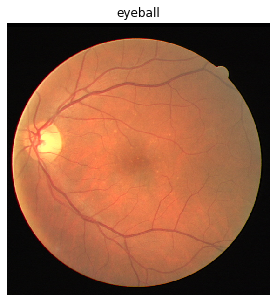

In [14]:
img.show(title='eyeball', figsize=(5, 5))

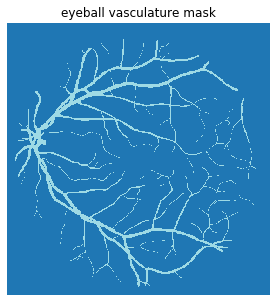

In [15]:
lbl_f = lbl_names[0]
mask = open_mask(lbl_f)
mask.show(title='eyeball vasculature mask', figsize=(5,5), alpha=1)

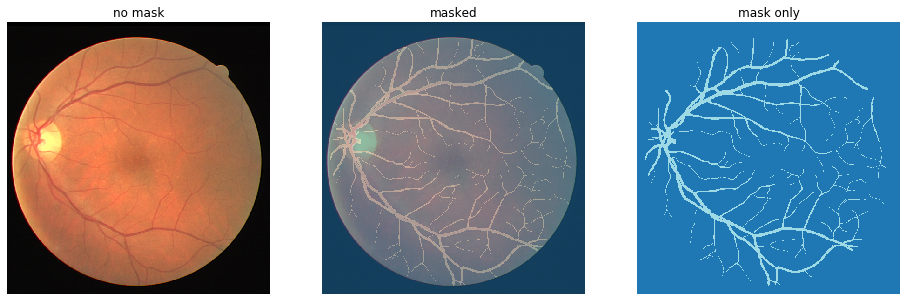

In [16]:
_,axs = plt.subplots(1,3, figsize=(16,8))
img.show(ax=axs[0], title='no mask')
img.show(ax=axs[1], y=mask, title='masked')
mask.show(ax=axs[2], title='mask only', alpha=2.)

In [24]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([584, 565]), tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]]))

In [41]:
codes = np.loadtxt('codes.txt', dtype=str); codes

array(['not_blood_vessel', 'vessel'], dtype='<U16')

In [40]:
#the floor division // rounds the result down to the nearest whole number
size = src_size//2

In [45]:
free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200: bs=8
else:           bs=4
print(f"using bs={bs}, have {free}MB of GPU RAM free")

using bs=8, have 9984MB of GPU RAM free


In [51]:
src = (SegmentationItemList.from_folder(path_img)
       .split_by_fname_file('../valid.txt'))

AttributeError: 'SegmentationItemList' object has no attribute 'show_batch'